In [1]:
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np


In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS=20

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potato datset",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [4]:
class_names=dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)

68

In [6]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    print(image_batch[0].numpy())

(32, 256, 256, 3)
[1 1 1 1 0 0 0 1 0 0 0 1 0 2 0 0 0 0 1 0 2 1 2 0 0 1 2 0 1 1 1 1]
[[[166. 158. 169.]
  [166. 158. 169.]
  [163. 155. 166.]
  ...
  [136. 124. 134.]
  [134. 122. 132.]
  [150. 138. 148.]]

 [[170. 162. 173.]
  [172. 164. 175.]
  [170. 162. 173.]
  ...
  [132. 120. 130.]
  [131. 119. 129.]
  [135. 123. 133.]]

 [[169. 161. 172.]
  [172. 164. 175.]
  [173. 165. 176.]
  ...
  [135. 123. 133.]
  [137. 125. 135.]
  [126. 114. 124.]]

 ...

 [[157. 146. 154.]
  [153. 142. 150.]
  [151. 140. 148.]
  ...
  [109.  96. 103.]
  [101.  88.  95.]
  [113. 100. 107.]]

 [[152. 141. 149.]
  [151. 140. 148.]
  [150. 139. 147.]
  ...
  [123. 110. 117.]
  [106.  93. 100.]
  [106.  93. 100.]]

 [[146. 135. 143.]
  [149. 138. 146.]
  [152. 141. 149.]
  ...
  [116. 103. 110.]
  [113. 100. 107.]
  [125. 112. 119.]]]


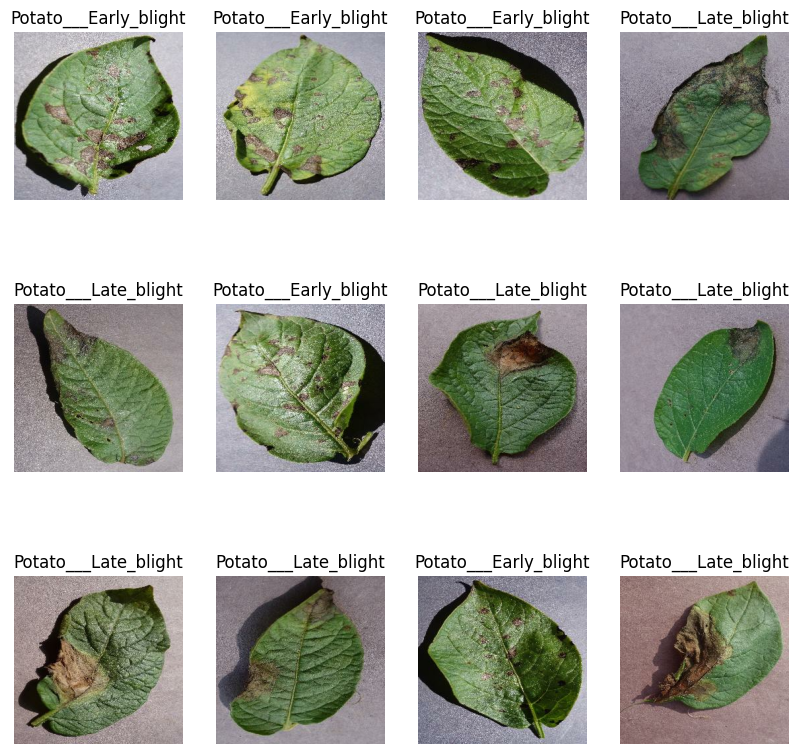

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
   for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [8]:
len(dataset)

68

In [9]:
# 80% for training
# 20% --> 10% for validation and 10% for testing


In [10]:
train_size=0.7
len(dataset)*train_size

47.599999999999994

In [11]:
train_ds=dataset.take(47)
len(train_ds)

47

In [12]:
test_ds=dataset.skip(47)
len(test_ds)

21

In [13]:
val_size=0.15
len(dataset)*val_size

10.2

In [14]:
val_ds=test_ds.take(10)
len(val_ds)

10

In [15]:
test_ds=test_ds.skip(10)
len(test_ds)

11

In [16]:
def get_dataset_partition_tf(ds, train_split=0.7, val_split=0.15, test_split=0.15, shuffle=True, shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)

    train_ds=ds.take(train_size)

    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [17]:
train_ds,val_ds,test_ds=get_dataset_partition_tf(dataset)

In [18]:
len(train_ds)


47

In [19]:
len(val_ds)

10

In [20]:
len(test_ds)

11

In [21]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
])

In [23]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2),
])

In [24]:
batch_input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_class = 3

model = models.Sequential([
    layers.InputLayer(batch_input_shape=batch_input_shape),  # Explicitly define the input shape
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_class, activation='softmax'),
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [26]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.4779 - loss: 0.9317 - val_accuracy: 0.6875 - val_loss: 0.7071
Epoch 2/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.7046 - loss: 0.6305 - val_accuracy: 0.8000 - val_loss: 0.4771
Epoch 3/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.8355 - loss: 0.3774 - val_accuracy: 0.8781 - val_loss: 0.3020
Epoch 4/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.8832 - loss: 0.2799 - val_accuracy: 0.8938 - val_loss: 0.2568
Epoch 5/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9235 - loss: 0.2102 - val_accuracy: 0.8438 - val_loss: 0.3966
Epoch 6/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.8840 - loss: 0.2855 - val_accuracy: 0.8969 - val_loss: 0.2364
Epoch 7/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 136s 3s/step - accuracy: 0.9374 - loss: 0.1474 - val_accuracy: 0.9187 - val_loss: 0.2379
Epoch 8/20
47/47 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.9144 - loss: 0.2146 - val_accuracy: 0.9312 - val_los

In [27]:
scores=model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 5s 311ms/step - accuracy: 0.9717 - loss: 0.1130


In [28]:
scores

[0.09316392242908478, 0.9772727489471436]

In [29]:
history

In [30]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [31]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [32]:
history.history['accuracy']

[0.5392287373542786,
 0.7320478558540344,
 0.8583776354789734,
 0.8796542286872864,
 0.8969414830207825,
 0.907579779624939,
 0.938829779624939,
 0.9281914830207825,
 0.9494680762290955,
 0.9614361524581909,
 0.9494680762290955,
 0.947473406791687,
 0.9813829660415649,
 0.980053186416626,
 0.9840425252914429,
 0.9820478558540344,
 0.9840425252914429,
 0.9780585169792175,
 0.96875,
 0.9860372543334961]

In [33]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

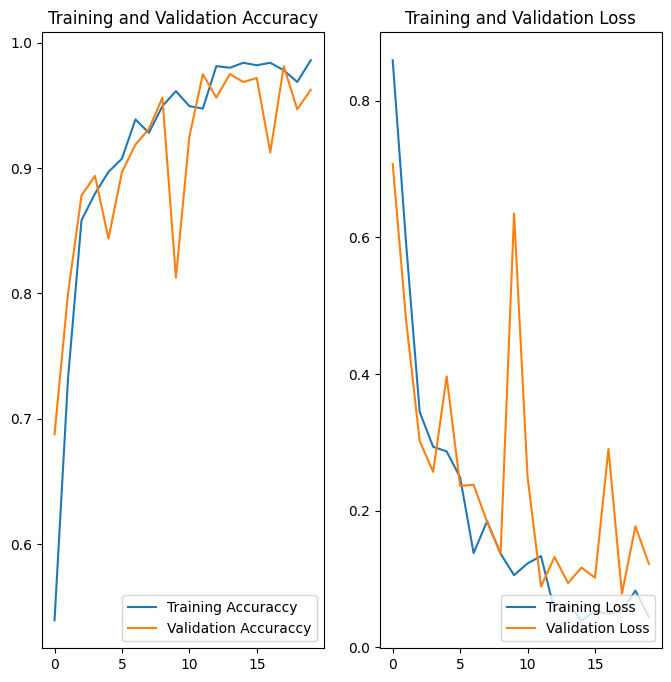

In [34]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc, label='Training Accuraccy')
plt.plot(range(EPOCHS),val_acc, label='Validation Accuraccy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),loss, label='Training Loss')
plt.plot(range(EPOCHS),val_loss, label='Validation Loss')
plt.legend(loc='lower right')
plt.title('Training and Validation Loss')

first image to predict
first image actual label :  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
[0.7086681  0.28828228 0.00304956]
0
predicted label: Potato___Early_blight


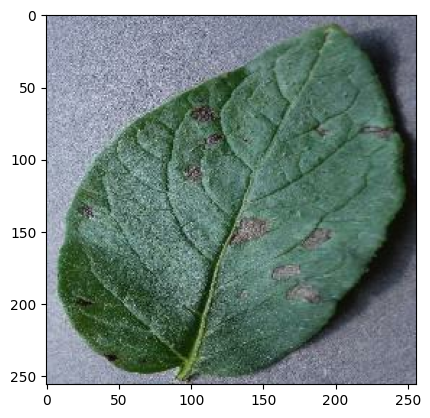

In [35]:
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("first image actual label : ",class_names[first_label])

    batch_prediction=model.predict(images_batch)
    print(batch_prediction[0])
    # predi_class_idx=np.argmax(batch_prediction[0])
    print(np.argmax(batch_prediction[0]))
    # print("predicted class : ",class_names[predi_class_idx])
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

First image to predict:


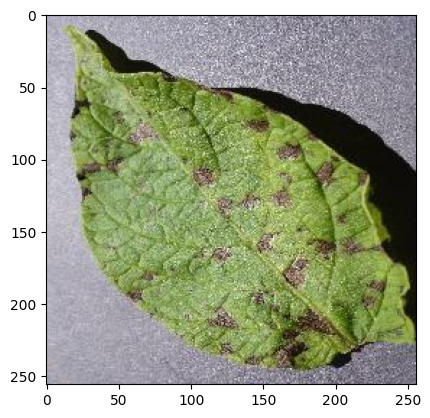

First image actual label: Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 325ms/step
Prediction probabilities: [9.9999869e-01 1.3160275e-06 7.4143009e-12]
Predicted class index: 0
Predicted label: Potato___Early_blight


In [36]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("First image to predict:")
    plt.imshow(first_image)
    plt.show()
    print("First image actual label:", class_names[first_label])

    # Predict using the correct variable name
    batch_prediction = model.predict(images_batch)
    
    print("Prediction probabilities:", batch_prediction[0])
    predicted_class_idx = np.argmax(batch_prediction[0])
    print("Predicted class index:", predicted_class_idx)
    print("Predicted label:", class_names[predicted_class_idx])

In [37]:
def predict(model, img):
    img_array=tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array=tf.expand_dims(img_array,0)

    predictions=model.predict(img_array)

    predicted_class=class_names[np.argmax(predictions[0])]
    confidence=round(100*(np.max(predictions[0])),2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


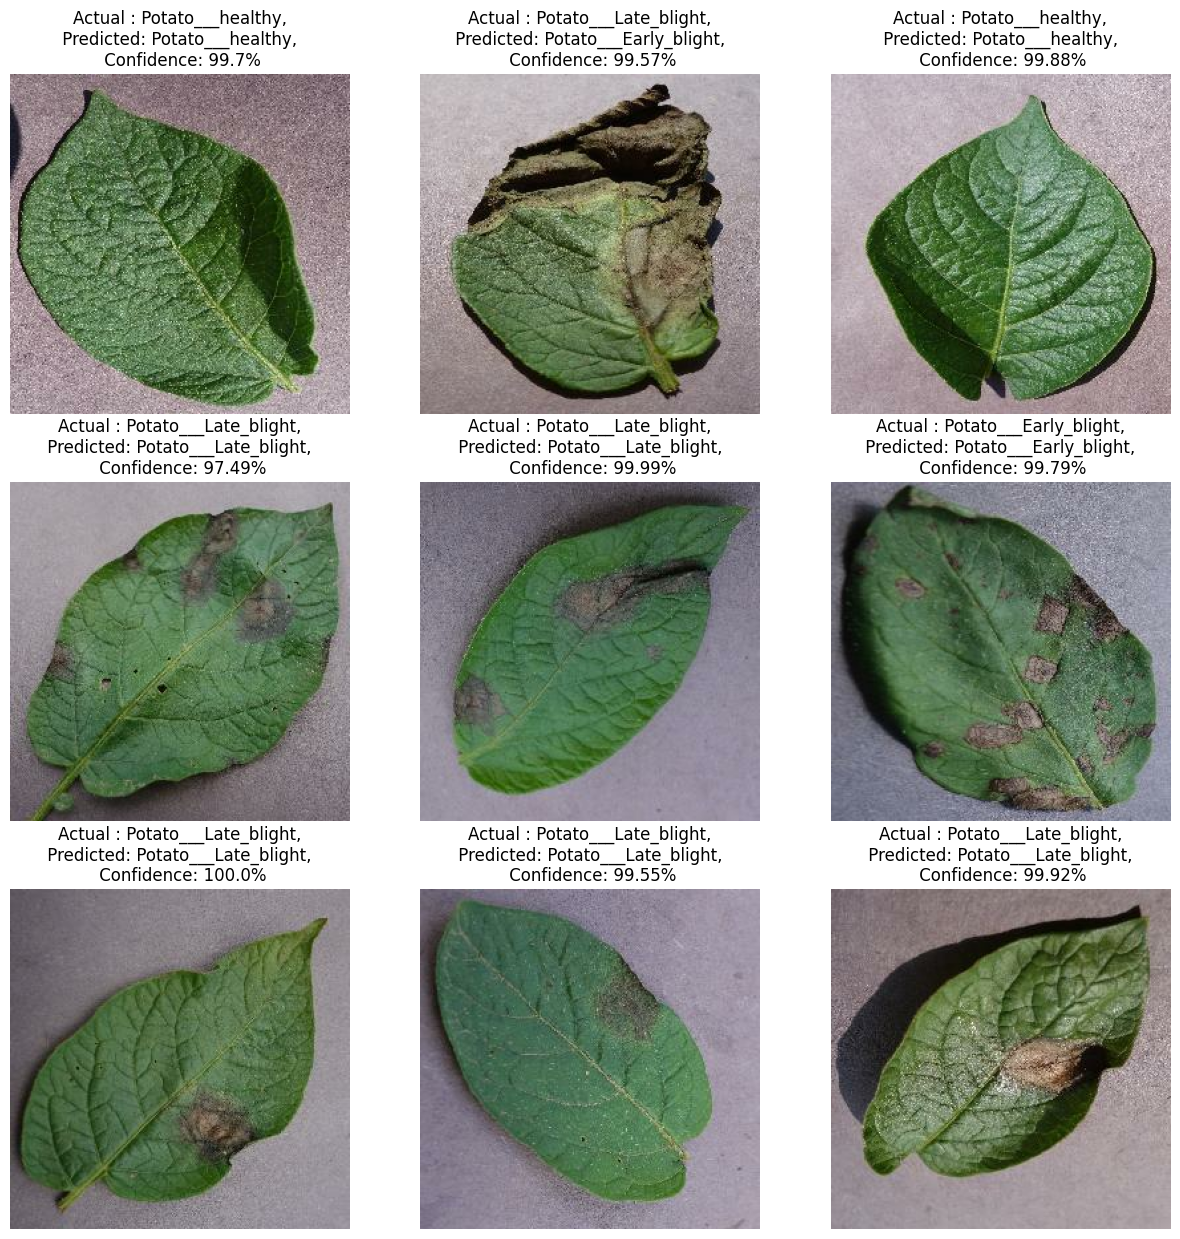

In [38]:
plt.figure(figsize=(15,15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax=plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype('uint8'))

        predicted_class, confidence =predict(model, images[i].numpy())
        actual_class=class_names[labels[i]]

        plt.title(f"Actual : {actual_class},\n Predicted: {predicted_class}, \n Confidence: {confidence}%")
        plt.axis('off')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


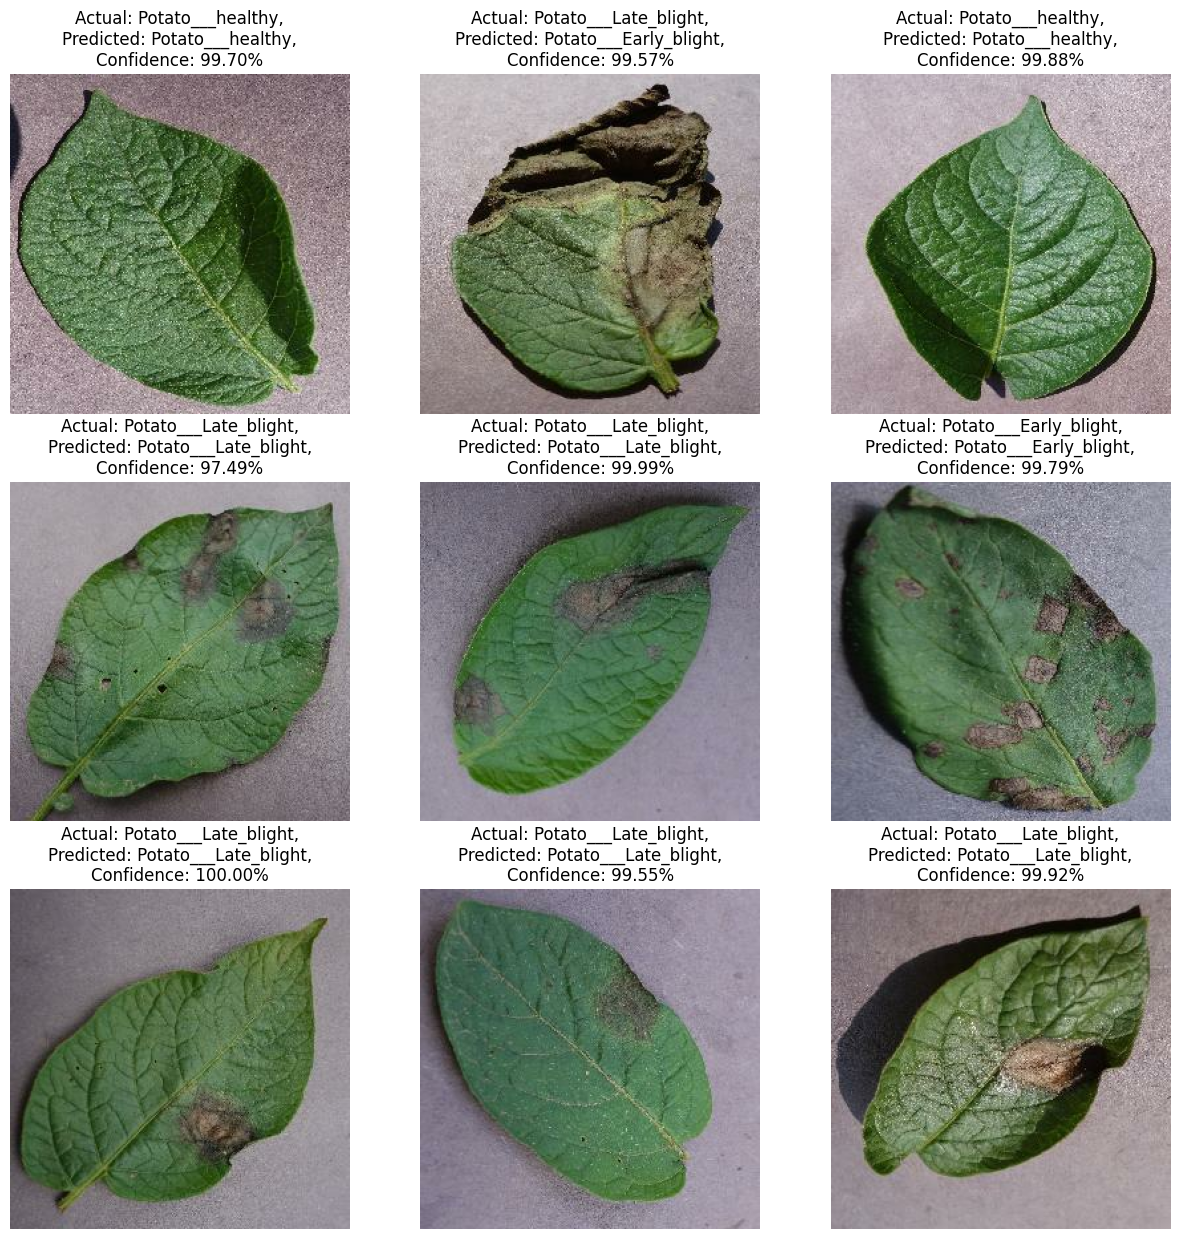

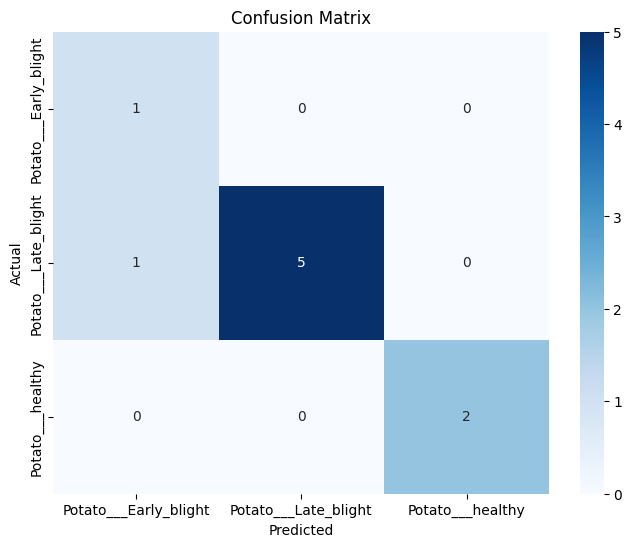

Classification Report:
                       precision    recall  f1-score   support

Potato___Early_blight       0.50      1.00      0.67         1
 Potato___Late_blight       1.00      0.83      0.91         6
     Potato___healthy       1.00      1.00      1.00         2

             accuracy                           0.89         9
            macro avg       0.83      0.94      0.86         9
         weighted avg       0.94      0.89      0.90         9

Accuracy: 0.8889
Precision: 0.9444
Recall: 0.8889
F1 Score: 0.9024
Mean Squared Error: 0.1111
PSNR: 100.00 dB
AUC not applicable for multi-class classification.


In [43]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to predict and return the predicted class, confidence
def predict(model, image):
    image = np.expand_dims(image, axis=0)  # Adding batch dimension
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100  # Confidence in percentage
    return predicted_class, confidence

# Function to calculate PSNR
def calculate_psnr(imageA, imageB):
    mse = np.mean((imageA - imageB) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * np.log10(max_pixel / np.sqrt(mse))
    return psnr

# Initialize arrays for actual and predicted labels
y_true = []
y_pred = []

# Your provided code: Loop through test dataset and plot images
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))

        # Predict and get the class and confidence
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = labels[i].numpy()

        # Append true and predicted classes for later metrics calculation
        y_true.append(actual_class)
        y_pred.append(predicted_class)

        # Plot title with actual and predicted class along with confidence
        plt.title(f"Actual: {class_names[actual_class]},\nPredicted: {class_names[predicted_class]},\nConfidence: {confidence:.2f}%")
        plt.axis('off')

# Convert to numpy arrays for metrics calculation
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# 1. Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Handle dynamic class names based on y_true
unique_labels = np.unique(y_true)  # Get unique labels in y_true
target_class_names = [class_names[i] for i in unique_labels]  # Match only the relevant class names

# 2. Classification Report (Precision, Recall, F1 Score per class)
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=target_class_names, labels=unique_labels))

# 3. Accuracy
accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 4. Precision, Recall, F1 Score (Weighted Average)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# 5. Mean Squared Error (Optional for regression tasks)
mse = mean_squared_error(y_true, y_pred)
print(f"Mean Squared Error: {mse:.4f}")

# 6. PSNR (Peak Signal-to-Noise Ratio) for image comparison
# Assuming you're comparing actual vs predicted image labels
psnr_values = [calculate_psnr(images[i].numpy(), images[i].numpy()) for i in range(9)]  # Placeholder comparison
print(f"PSNR: {np.mean(psnr_values):.2f} dB")

# 7. AUC (only for binary classification tasks)
if len(unique_labels) == 2:  # AUC is for binary classification
    auc = roc_auc_score(y_true, y_pred)
    print(f"AUC: {auc:.4f}")
else:
    print("AUC not applicable for multi-class classification.")


In [40]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [40]:
import tensorflow as tf
import os

model_version = 13
model_save_path = os.path.join("..", "models", f"model_v{model_version}.keras")

# Ensure the directory exists
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Save the model
model.save(model_save_path)

print(f"Model saved to: {model_save_path}")


Model saved to: ..\models\model_v13.keras
